# 대표적인 이산형 확률분포

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%precision 3
%matplotlib inline

다양한 이산형 확률 분포를 소개한다.  
이산형 확률분포의 성질을 이해하기 쉽도록 다음의 함수를 생성한다.

In [2]:
# 그래프 선의 종류
linestyles = ['-', '--', ':']

# 기대값 함수
def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

# 분산 함수
def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

# 확률변수가 확률의 성질을 만족하는지 확인한고 기대값과 분산을 계산
def check_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob >= 0), 'minus probability'
    prob_sum = np.round(np.sum(prob), 6)
    assert prob_sum == 1, f'sum of probability{prob_sum}'
    print(f'expected value {E(X):.4}')
    print(f'variance {(V(X)):.4}')

# 확률함수와 기대값을 그림으로 표시
def plot_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label='prob')
    ax.vlines(E(X), 0, 1, label='mean', colors='black')
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0, prob.max()*1.2)
    ax.legend()
    
    plt.show()

## 베르누이 분포

대표적인 이산형 분포로 확률변수가 취할 수 있는 값이 0 또는 1 밖에 없다. 베르누이 시행을 하여 1이 나오면 성공, 0이 나오면 실패라고 한다.

$$ f(x) = p^x(1-p)^{(1-x)} , (x \in \{0,1\})$$

베르누이 분포를 numpy로 구현하면 다음과 같다.

In [3]:
def Bern(p):
    x_set = np.array([0, 1])
    def f(x):
        if x in x_set:
            return p ** x * (1-p) ** (1-x)
        else:
            return 0
    return x_set, f

Bern(0.3) 분포를 따르는 확률분포 X를 작성하면 다음과 같다.

In [4]:
p = 0.3
X = Bern(p)

#### 베르누이 분포의 기대값과 분산
X ~ Bern(p) 일때,
$$ E(X) = p , \qquad Var(X) = p(1-p) $$

In [5]:
check_prob(X)

expected value 0.3
variance 0.21


#### 베르누이 확률분포의 그래프 

중앙의 세로선이 확률변수 X의 기대값을 나타낸다.

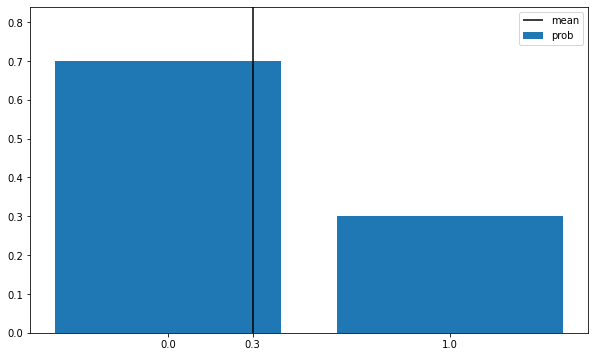

In [6]:
plot_prob(X)

## scipy.stat를 사용하여 구현하기

SciPy('사이파이'라고 읽음)는 과학기술계산을 위한 Python 라이브러리이다.  
scipy.stats 서브패키지는 여러가지 확률 분포 분석을 위한 기능을 제공한다.

```
X = stats.binom(10, 0.2) # Declare X to be a binomial random variable

print(X.pmf(3))           # P(X = 3)
print(X.cdf(4))           # P(X <= 4)
print(X.mean())           # E[X]
print(X.var())            # Var(X)
print(X.std())            # Std(X)
print(X.rvs())            # Get a random sample from X
print(X.rvs(10))          # Get 10 random samples form X
```

In [45]:
p = 0.3

In [46]:
rv = stats.bernoulli(p)    # 베르누이 확률변수를 선언

In [47]:
rv.pmf(0), rv.pmf(1)       # P(X=0), P(X=1)

(0.7, 0.3)

In [48]:
rv.pmf([0, 1])

array([0.7, 0.3])

In [49]:
rv.cdf([0, 1])             # 누적밀도함수를 계산

array([0.7, 1. ])

In [50]:
rv.mean(), rv.var()        # 기대값과 분산을 계산

(0.3, 0.21)

In [62]:
rv.rvs(10) # 해당 분포에서 임의로 10개를 샘플링함

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0])

## 이항분포

동일한 성공확률을 가진 베르누이 시행을 독립적으로 반복하여 실시할 때의 ‘X =성공횟수’의 분포를 이항분포(binomial distribution)라 한다.

성공확류 p와 시행횟수 n이 모수이다. 

$$ f(x) = _{n}\mathrm{C}_{x} p^x(1-p)^{(n-x)} \qquad (x \in \{0,1,2,...,n\}) $$

이때 기호 $ _{n}\mathrm{C}_{x}$는 combination으로 n개의 서로 다른 것 중에서 x개를 고를 수 있는 조합의 수이다.   $  _{n}\mathrm{C}_{x} = \frac{n!}{x!(n-x)!}$

이항분포의 평균 E(X) = np, 분산은 Var(X) = np(1-p) 이다.

In [14]:
from scipy.special import comb

def Bin(n, p):
    x_set = np.arange(n+1)
    def f(x):
        if x in x_set:
            return comb(n, x) * p**x * (1-p)**(n-x)
        else:
            return 0
    return x_set, f

동전을 10회 던져 앞면이 3번 나오는 확률은?

In [15]:
n = 10
p = 0.5
X = Bin(n, p)

In [16]:
X[1](3) # 동전을 10회 던져 앞면이 3번 나오는 확률 = 15/128

0.1171875

In [17]:
check_prob(X)

expected value 5.0
variance 2.5


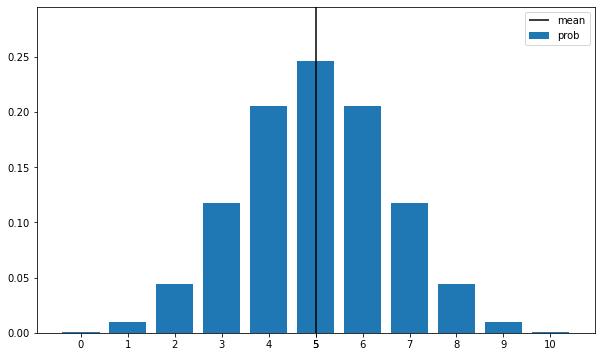

In [18]:
plot_prob(X)

scipy.stats 에서 이항분포의 확률변수는 `binom 함수`로 생성한다.  
n을 10으로 고정하고 p를 0.3, 0.5, 0.7 로 변화시켜 이항분포가 어떤 형태가 되는지 살며보자.

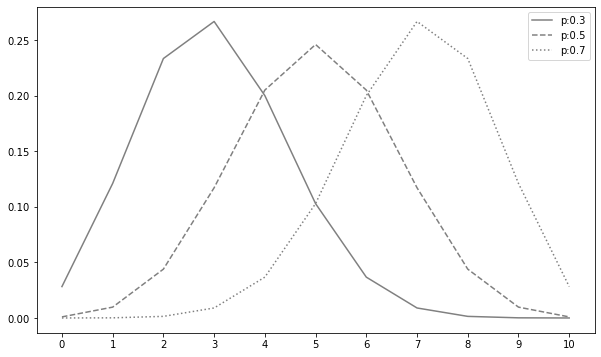

In [19]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_set = np.arange(n+1)
for p, ls in zip([0.3, 0.5, 0.7], linestyles):
    rv = stats.binom(n, p)
    ax.plot(x_set, rv.pmf(x_set),
            label=f'p:{p}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()

plt.show()

## 초기하분포

초기하분포(Hypergeometric distribution)란 비복원추출에서 N개 중에 n번 추출했을때 원하는 것 x개가 뽑힐 확률의 분포이다.

$$ f(x) = \frac{{D \choose x}{N-D \choose n-x}}{{N \choose n}}  \qquad (x \in \{0,1,2,...,n\})$$

초기하분포의 평균 E(X) = np, 분산은 $ Var(X)= np(1-p)\frac{N-n}{N-1}$

20 마리의 동물 모음이 있다고 가정 해 보자. 그 중 7 마리는 개이다. 그런 다음 20 마리 중 무작위로 12 마리를 선택하면 주어진 개수의 개를 찾을 확률을 알고 싶다.

In [20]:
from scipy.stats import hypergeom

[M, n, N] = [20, 7, 12]  # 20마리중 7마리는 개. 이중 12마리를 선택할때 x마리의 개를 뽑을 확률
rv = hypergeom(M, n, N)
x = np.arange(0, n+1)
pmf_dogs = rv.pmf(x)

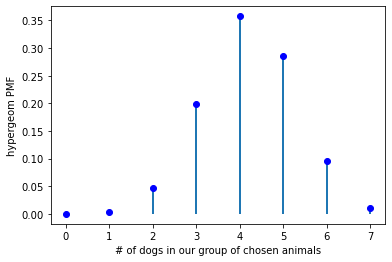

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, pmf_dogs, 'bo')
ax.vlines(x, 0, pmf_dogs, lw=2)
ax.set_xlabel('# of dogs in our group of chosen animals')
ax.set_ylabel('hypergeom PMF')
plt.show()

## 포아송 분포

단위시간 동안 혹은 단위공간에서 어떤 사건이 발생하는 횟수를 나타내는 확률분포이다.  

$$ f(x) = \frac{e^{-\lambda}\lambda^x}{x!} \qquad x= 1,2,3...$$

이때 $\lambda$ 는 평균 출현 횟수이다.

포아송 분포의 기대값 E(X) = $\lambda$, 분산 Var(X) = $\lambda$ 이다.

In [22]:
from scipy.special import factorial

def Poi(lam):
    x_set = np.arange(20)
    def f(x):
        if x in x_set:
            return np.power(lam, x) / factorial(x) * np.exp(-lam)
        else:
            return 0
    return x_set, f

하루 평균 3건의 교통사고가 발생하는 지역의 포아송 분포는 다음과 같다.

In [23]:
lam = 3
X = Poi(lam)

In [24]:
check_prob(X)

expected value 3.0
variance 3.0


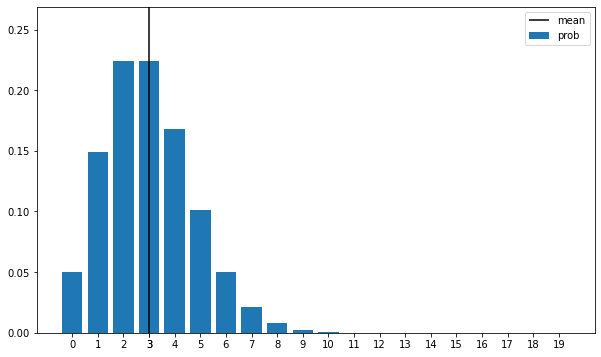

In [25]:
plot_prob(X)

scipy.stats에서 포아송 분포는 poisson 함수로 생성할 수 있다. 이때 $\lambda$를 3,5,8로 변화할 때 포아송 분포의 형태가 어떻게 될지 그래프로 나타낸다. $\lambda$가 커질수록 경사면이 완만해 진다.

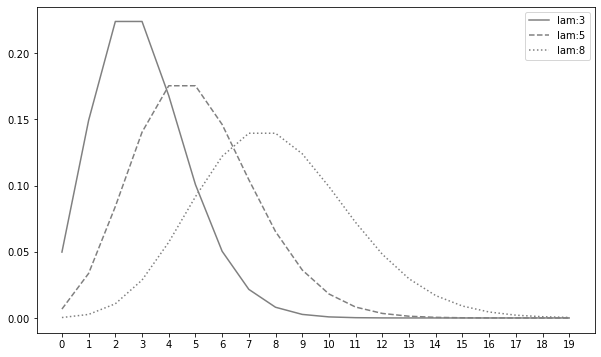

In [26]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_set = np.arange(20)
for lam, ls in zip([3, 5, 8], linestyles):
    rv = stats.poisson(lam)
    ax.plot(x_set, rv.pmf(x_set),
            label=f'lam:{lam}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()

plt.show()

# 실습

1. 복권의 당첨률이 30% 라고 한다. 복권을 8장 구입했다. 이항분포로 다음의 확률을 구하시오.
    - 4장이 당첨될 확률은? ($P=4$)
    - 3장에서 7장 당첨될 확률은? ( $P(3\le X \le 7$ )
    - 6장 이상 당첨될 확률은? ( $P \ge 6$ )